In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

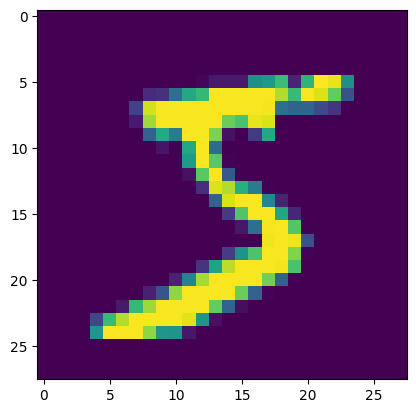

In [ ]:
plt.imshow(x_train_full[0])

In [ ]:
# feature scaling
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [ ]:
# Train_Valid_Test Split
x_valid, x_train = x_train_n[:6000],x_train_n[6000:]
y_valid, y_train = y_train_full[:6000],y_train_full[6000:]
x_test = x_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer = 'sgd')

In [ ]:
model_r = model.fit(x_train,y_train,epochs=60, validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 26s 14ms/step - loss: 0.6203 - accuracy: 0.8409 - val_loss: 0.3164 - val_accuracy: 0.9102
Epoch 2/60
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2964 - accuracy: 0.9163 - val_loss: 0.2525 - val_accuracy: 0.9345
Epoch 3/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2446 - accuracy: 0.9304 - val_loss: 0.2191 - val_accuracy: 0.9407
Epoch 4/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2106 - accuracy: 0.9404 - val_loss: 0.1893 - val_accuracy: 0.9497
Epoch 5/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1849 - accuracy: 0.9473 - val_loss: 0.1707 - val_accuracy: 0.9540
Epoch 6/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1645 - accuracy: 0.9528 - val_loss: 0.1562 - val_accuracy: 0.9592
Epoch 7/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1480 - accuracy: 0.9581 - val_loss: 0.1447 - val_accura

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9776


[0.07920369505882263, 0.9775999784469604]

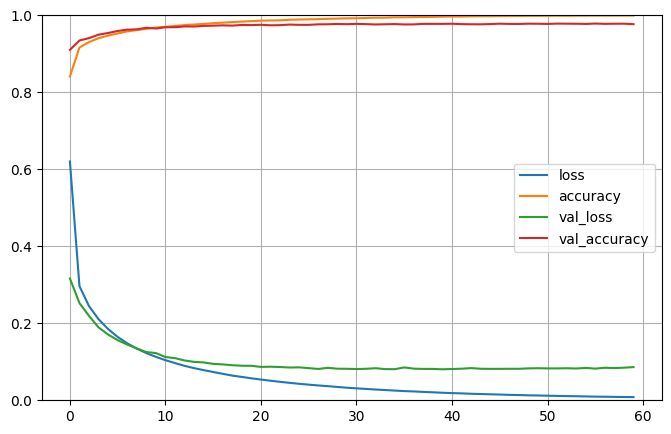

In [ ]:
pd.DataFrame(model_r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
x_new=x_test[:5]

In [ ]:
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 92ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predict_x = model.predict(x_new)
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
classes_x

array([7, 2, 1, 0, 4])